Изменён гиперпараметр 'epochs': 5 -> 10. Данный параметр отвечает за количество циклов обучения. В данном случае, итоговая точность увеличилась на ~0.001, поэтому можно сделать вывод, что увеличение количества циклов в данном случае никак не влияет на точность модели.

In [1]:
from tensorflow import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

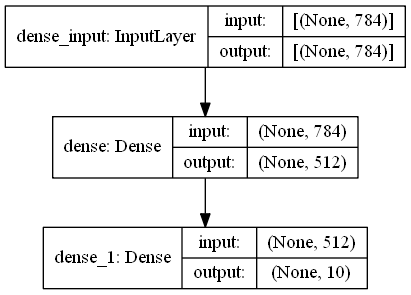

In [3]:
keras.utils.plot_model(network, show_shapes=True, show_layer_names=True)

In [4]:
# Назначение функции потерь и оптимизатора
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
history = network.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=2)

Epoch 1/10
469/469 - 3s - loss: 0.2553 - accuracy: 0.9258
Epoch 2/10
469/469 - 3s - loss: 0.1019 - accuracy: 0.9704
Epoch 3/10
469/469 - 3s - loss: 0.0685 - accuracy: 0.9795
Epoch 4/10
469/469 - 3s - loss: 0.0495 - accuracy: 0.9851
Epoch 5/10
469/469 - 3s - loss: 0.0368 - accuracy: 0.9889
Epoch 6/10
469/469 - 3s - loss: 0.0291 - accuracy: 0.9914
Epoch 7/10
469/469 - 3s - loss: 0.0216 - accuracy: 0.9936
Epoch 8/10
469/469 - 3s - loss: 0.0168 - accuracy: 0.9952
Epoch 9/10
469/469 - 3s - loss: 0.0134 - accuracy: 0.9960
Epoch 10/10
469/469 - 3s - loss: 0.0098 - accuracy: 0.9973


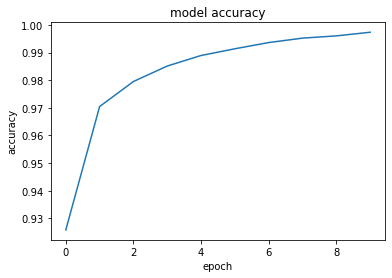

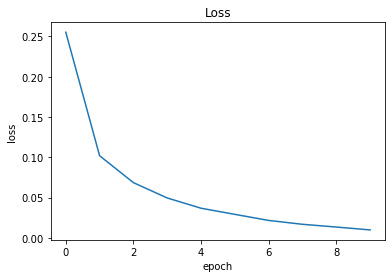

In [7]:
import matplotlib.pyplot as plt
history_dict = history.history

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 910us/step - loss: 0.0715 - accuracy: 0.9814
